# Problem Statement: Predictive Analytics for Chronic Kidney Disease Detection

## Context
In healthcare operations, early detection of chronic diseases can significantly reduce mortality rates, improve patient outcomes, and decrease healthcare costs. Chronic Kidney Disease (CKD) is a silent epidemic affecting over **850 million people worldwide**, often progressing asymptomatically until advanced stages when treatment options become limited.

Routine laboratory tests provide critical signals for early detection, but interpreting complex patterns across multiple biomarkers requires specialized expertise and time.  
The objective of this project is to design a **predictive analytics system** using the **Chronic Kidney Disease (CKD) Dataset**, which contains multivariate clinical laboratory measurements from real patients, including blood tests, urine analysis, and clinical parameters collected until diagnosis.

---

## Dataset Overview
- **Total Attributes:** 25  
- **Features:** 24  
- **Target Variable:** 1 (Class)  
- **Numerical Attributes:** 11  
- **Nominal Attributes:** 14  

---

## Attribute Information

| No. | Attribute Name | Symbol | Type | Description / Values |
|----:|---------------|--------|------|----------------------|
| 1 | Age | age | Numerical | Age in years |
| 2 | Blood Pressure | bp | Numerical | Blood pressure in mm/Hg |
| 3 | Specific Gravity | sg | Nominal | (1.005, 1.010, 1.015, 1.020, 1.025) |
| 4 | Albumin | al | Nominal | (0, 1, 2, 3, 4, 5) |
| 5 | Sugar | su | Nominal | (0, 1, 2, 3, 4, 5) |
| 6 | Red Blood Cells | rbc | Nominal | (normal, abnormal) |
| 7 | Pus Cell | pc | Nominal | (normal, abnormal) |
| 8 | Pus Cell Clumps | pcc | Nominal | (present, notpresent) |
| 9 | Bacteria | ba | Nominal | (present, notpresent) |
| 10 | Blood Glucose Random | bgr | Numerical | Blood glucose in mgs/dl |
| 11 | Blood Urea | bu | Numerical | Blood urea in mgs/dl |
| 12 | Serum Creatinine | sc | Numerical | Serum creatinine in mgs/dl |
| 13 | Sodium | sod | Numerical | Sodium in mEq/L |
| 14 | Potassium | pot | Numerical | Potassium in mEq/L |
| 15 | Hemoglobin | hemo | Numerical | Hemoglobin in gms |
| 16 | Packed Cell Volume | pcv | Numerical | Volume percentage of red blood cells |
| 17 | White Blood Cell Count | wc | Numerical | Cells per cumm |
| 18 | Red Blood Cell Count | rc | Numerical | Millions per cmm |
| 19 | Hypertension | htn | Nominal | (yes, no) |
| 20 | Diabetes Mellitus | dm | Nominal | (yes, no) |
| 21 | Coronary Artery Disease | cad | Nominal | (yes, no) |
| 22 | Appetite | appet | Nominal | (good, poor) |
| 23 | Pedal Edema | pe | Nominal | (yes, no) |
| 24 | Anemia | ane | Nominal | (yes, no) |
| 25 | Class (Target) | class | Nominal | (ckd, notckd) |

---

## Objective
To build a machine learning–based predictive model that accurately classifies patients as **CKD** or **Non-CKD**, enabling early diagnosis and supporting clinical decision-making.


## Importing Required Libraries

In [2]:
import numpy as np # numerical operations
import pandas as pd # handling datasets
from ucimlrepo import fetch_ucirepo # easily import datasets
import matplotlib.pyplot as plt # data visualisation 
import seaborn as sns # high end plots 
import math # mathematical equations


In [3]:
# fetch dataset 
chronic_kidney_disease = fetch_ucirepo(id=336)

#  data (as pandas dataframes)
X = chronic_kidney_disease.data.features
y = chronic_kidney_disease.data.targets

# concatenate the X & y features
df = pd.concat([X, y], axis=1)

In [4]:
# view first 5 rows from the dataframe
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [5]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

In [13]:
# change the datatypes to 'category'
df['sg'] = df['sg'].astype('category')
df['al'] = df['al'].astype('category')
df['su'] = df['su'].astype('category')
df['rbc'] = df['rbc'].astype('category')
df['pc'] = df['pc'].astype('category')
df['pcc'] = df['pcc'].astype('category')
df['ba'] = df['ba'].astype('category')
df['htn'] = df['htn'].astype('category')
df['dm'] = df['dm'].astype('category')
df['cad'] = df['cad'].astype('category')
df['appet'] = df['appet'].astype('category')
df['pe'] = df['pe'].astype('category')
df['ane'] = df['ane'].astype('category')
df['class'] = df['class'].astype('category')

In [7]:
# description of numerical data
df.describe()

,age,bp,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [8]:
# check for the missing values
df.isna().sum().sort_values(ascending = False)

rbc      152
rbcc     131
wbcc     106
pot       88
sod       87
pcv       71
pc        65
hemo      52
su        49
sg        47
al        46
bgr       44
bu        19
sc        17
bp        12
age        9
ba         4
pcc        4
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [9]:
# check for duplicates
df.duplicated().sum()

0

In [10]:
# replace '\tno' to 'no' in dm
df['dm'] = df['dm'].str.replace('\tno', 'no', regex=False)
# replace 'ckd\t' to 'ckd' in class
df['class'] = df['class'].str.replace('ckd\t', 'ckd', regex=False)

In [11]:
def categorical_counts(cat_cols):
    for col in cat_cols:
        print(f"\nColumn: {col}")
        print(df[col].value_counts(dropna=False))
        print("-" * 30)

cate_list = [
    'sg','al','su','rbc','pc','pcc','ba',
    'htn','dm','cad','appet','pe','ane','class'
]

categorical_counts(cate_list)



Column: sg
sg
1.02     106
1.01      84
1.025     81
1.015     75
NaN       47
1.005      7
Name: count, dtype: int64
------------------------------

Column: al
al
0.0    199
NaN     46
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: count, dtype: int64
------------------------------

Column: su
su
0.0    290
NaN     49
2.0     18
3.0     14
1.0     13
4.0     13
5.0      3
Name: count, dtype: int64
------------------------------

Column: rbc
rbc
normal      201
NaN         152
abnormal     47
Name: count, dtype: int64
------------------------------

Column: pc
pc
normal      259
abnormal     76
NaN          65
Name: count, dtype: int64
------------------------------

Column: pcc
pcc
notpresent    354
present        42
NaN             4
Name: count, dtype: int64
------------------------------

Column: ba
ba
notpresent    374
present        22
NaN             4
Name: count, dtype: int64
------------------------------

Column: htn
htn
no     251
yes    147
NaN      2
Name: 

## EDA

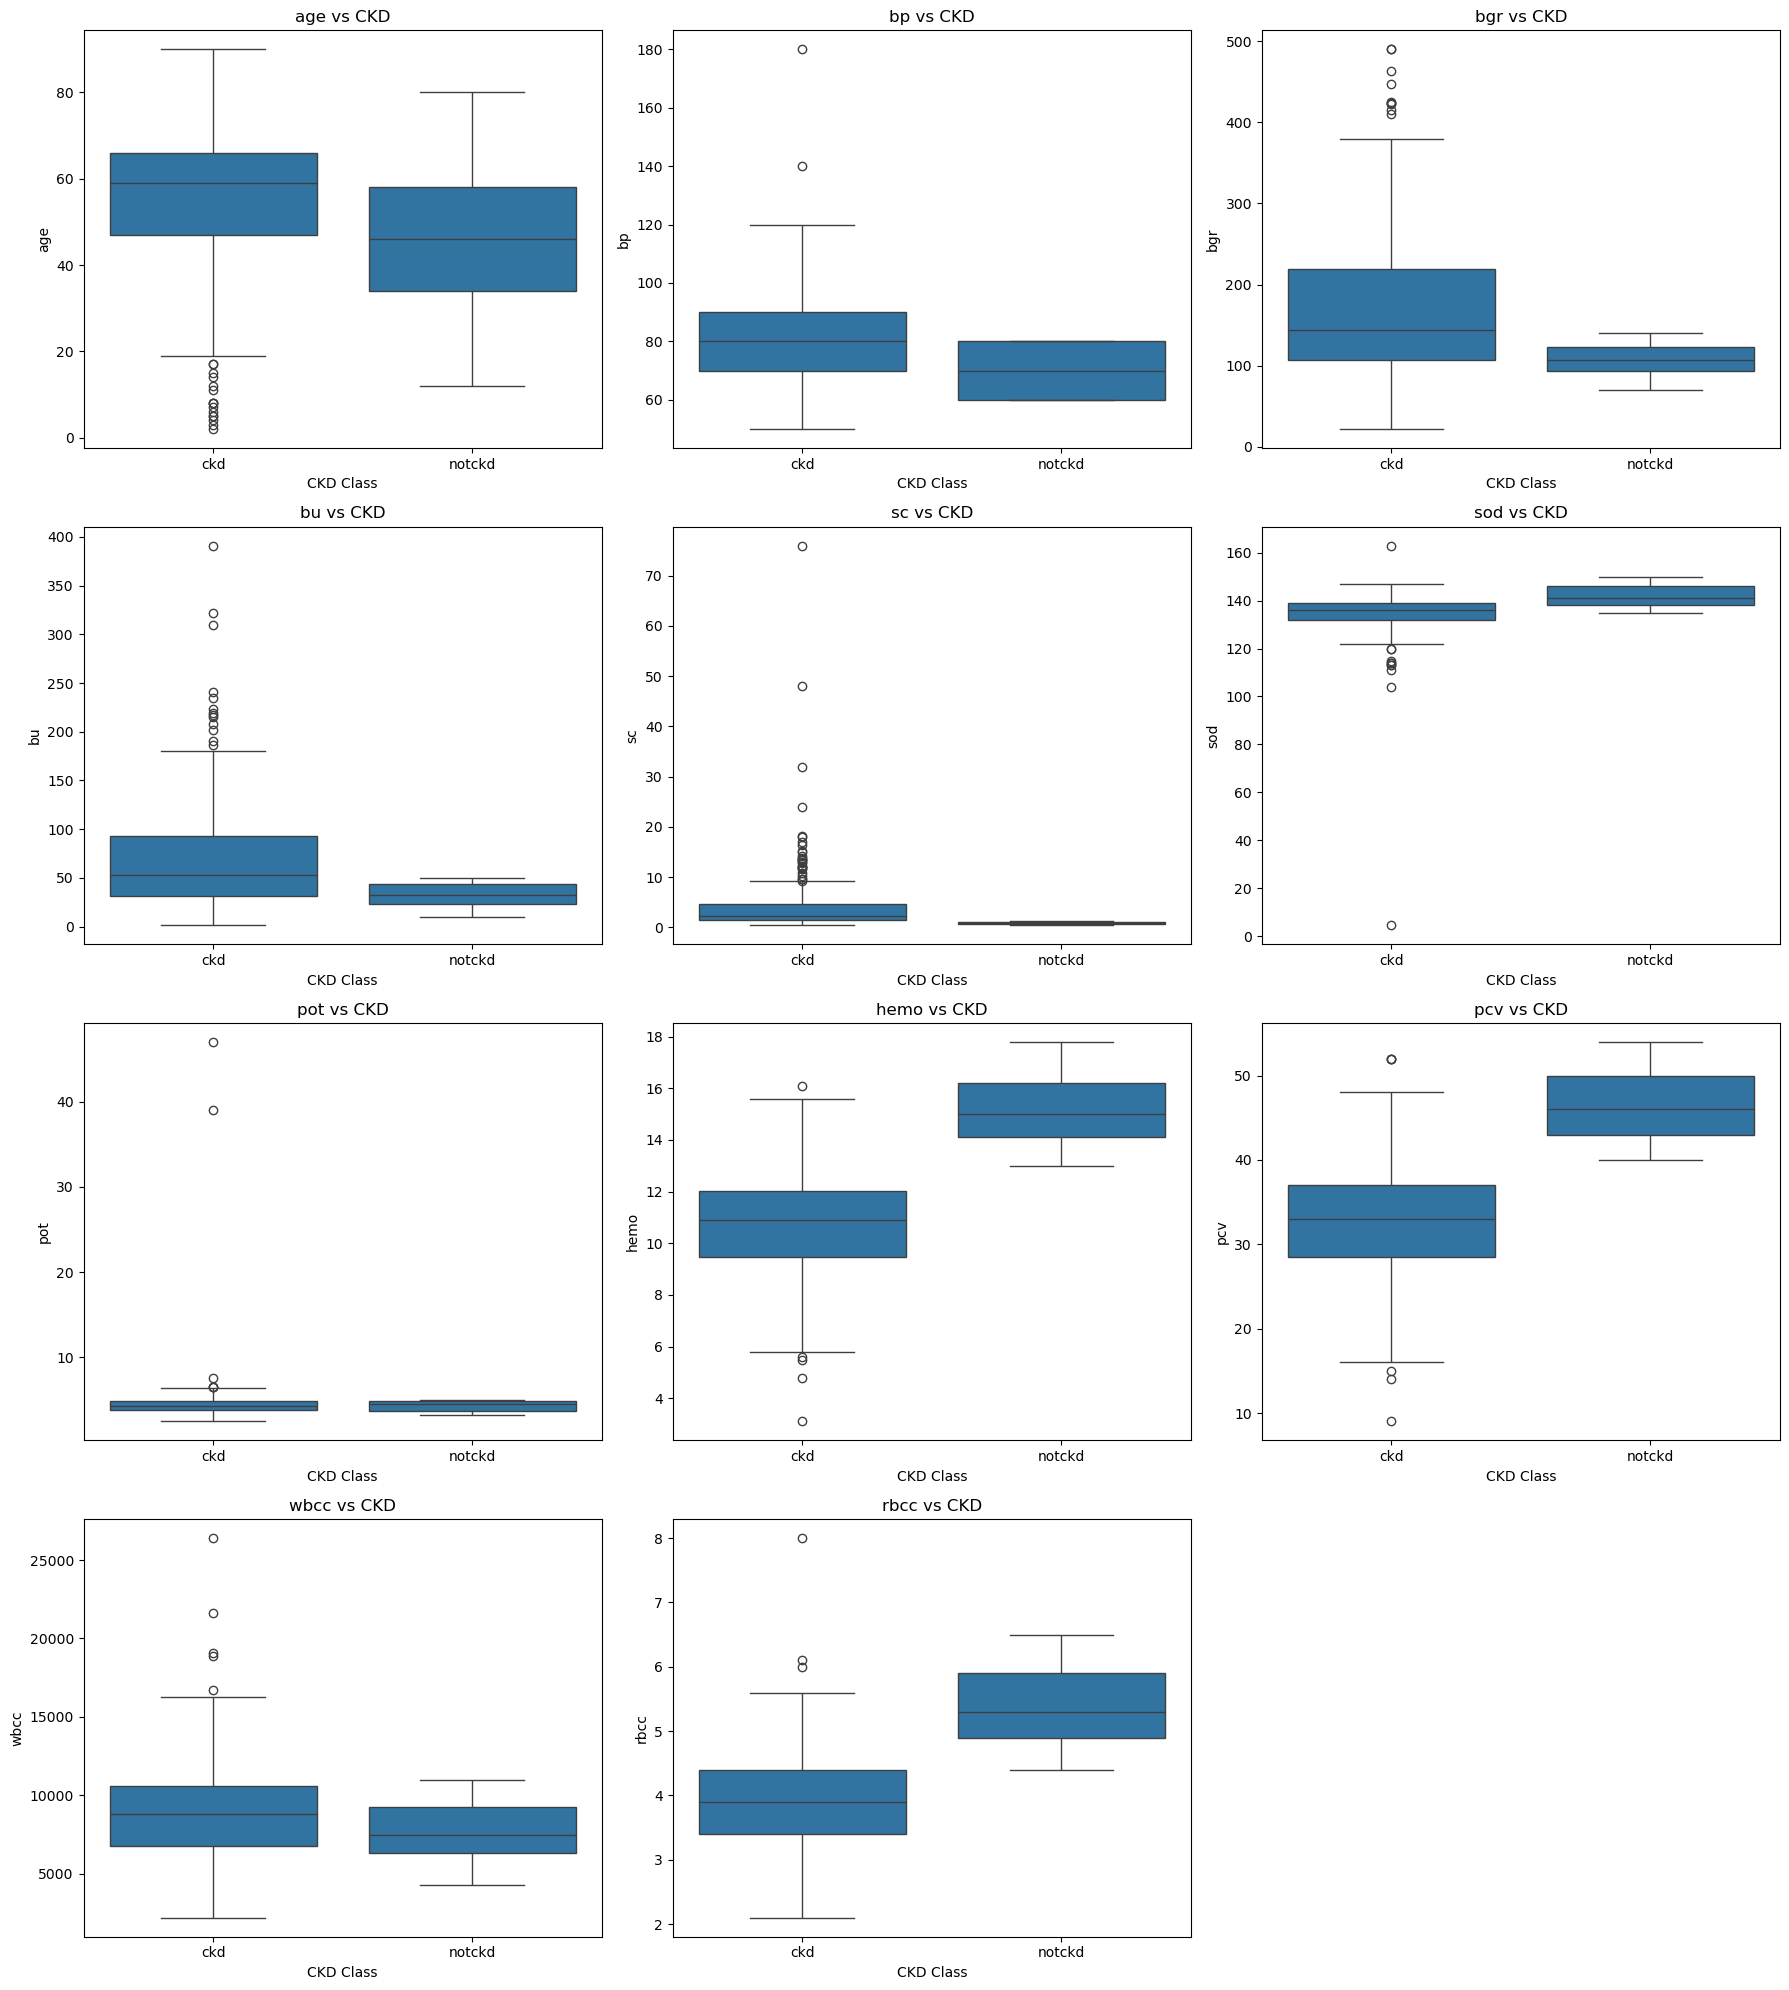

In [17]:
num_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot',
            'hemo', 'pcv', 'wbcc', 'rbcc']

n_cols = 3
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x='class', y=col, data=df)
    plt.title(f'{col} vs CKD')
    plt.xlabel('CKD Class')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


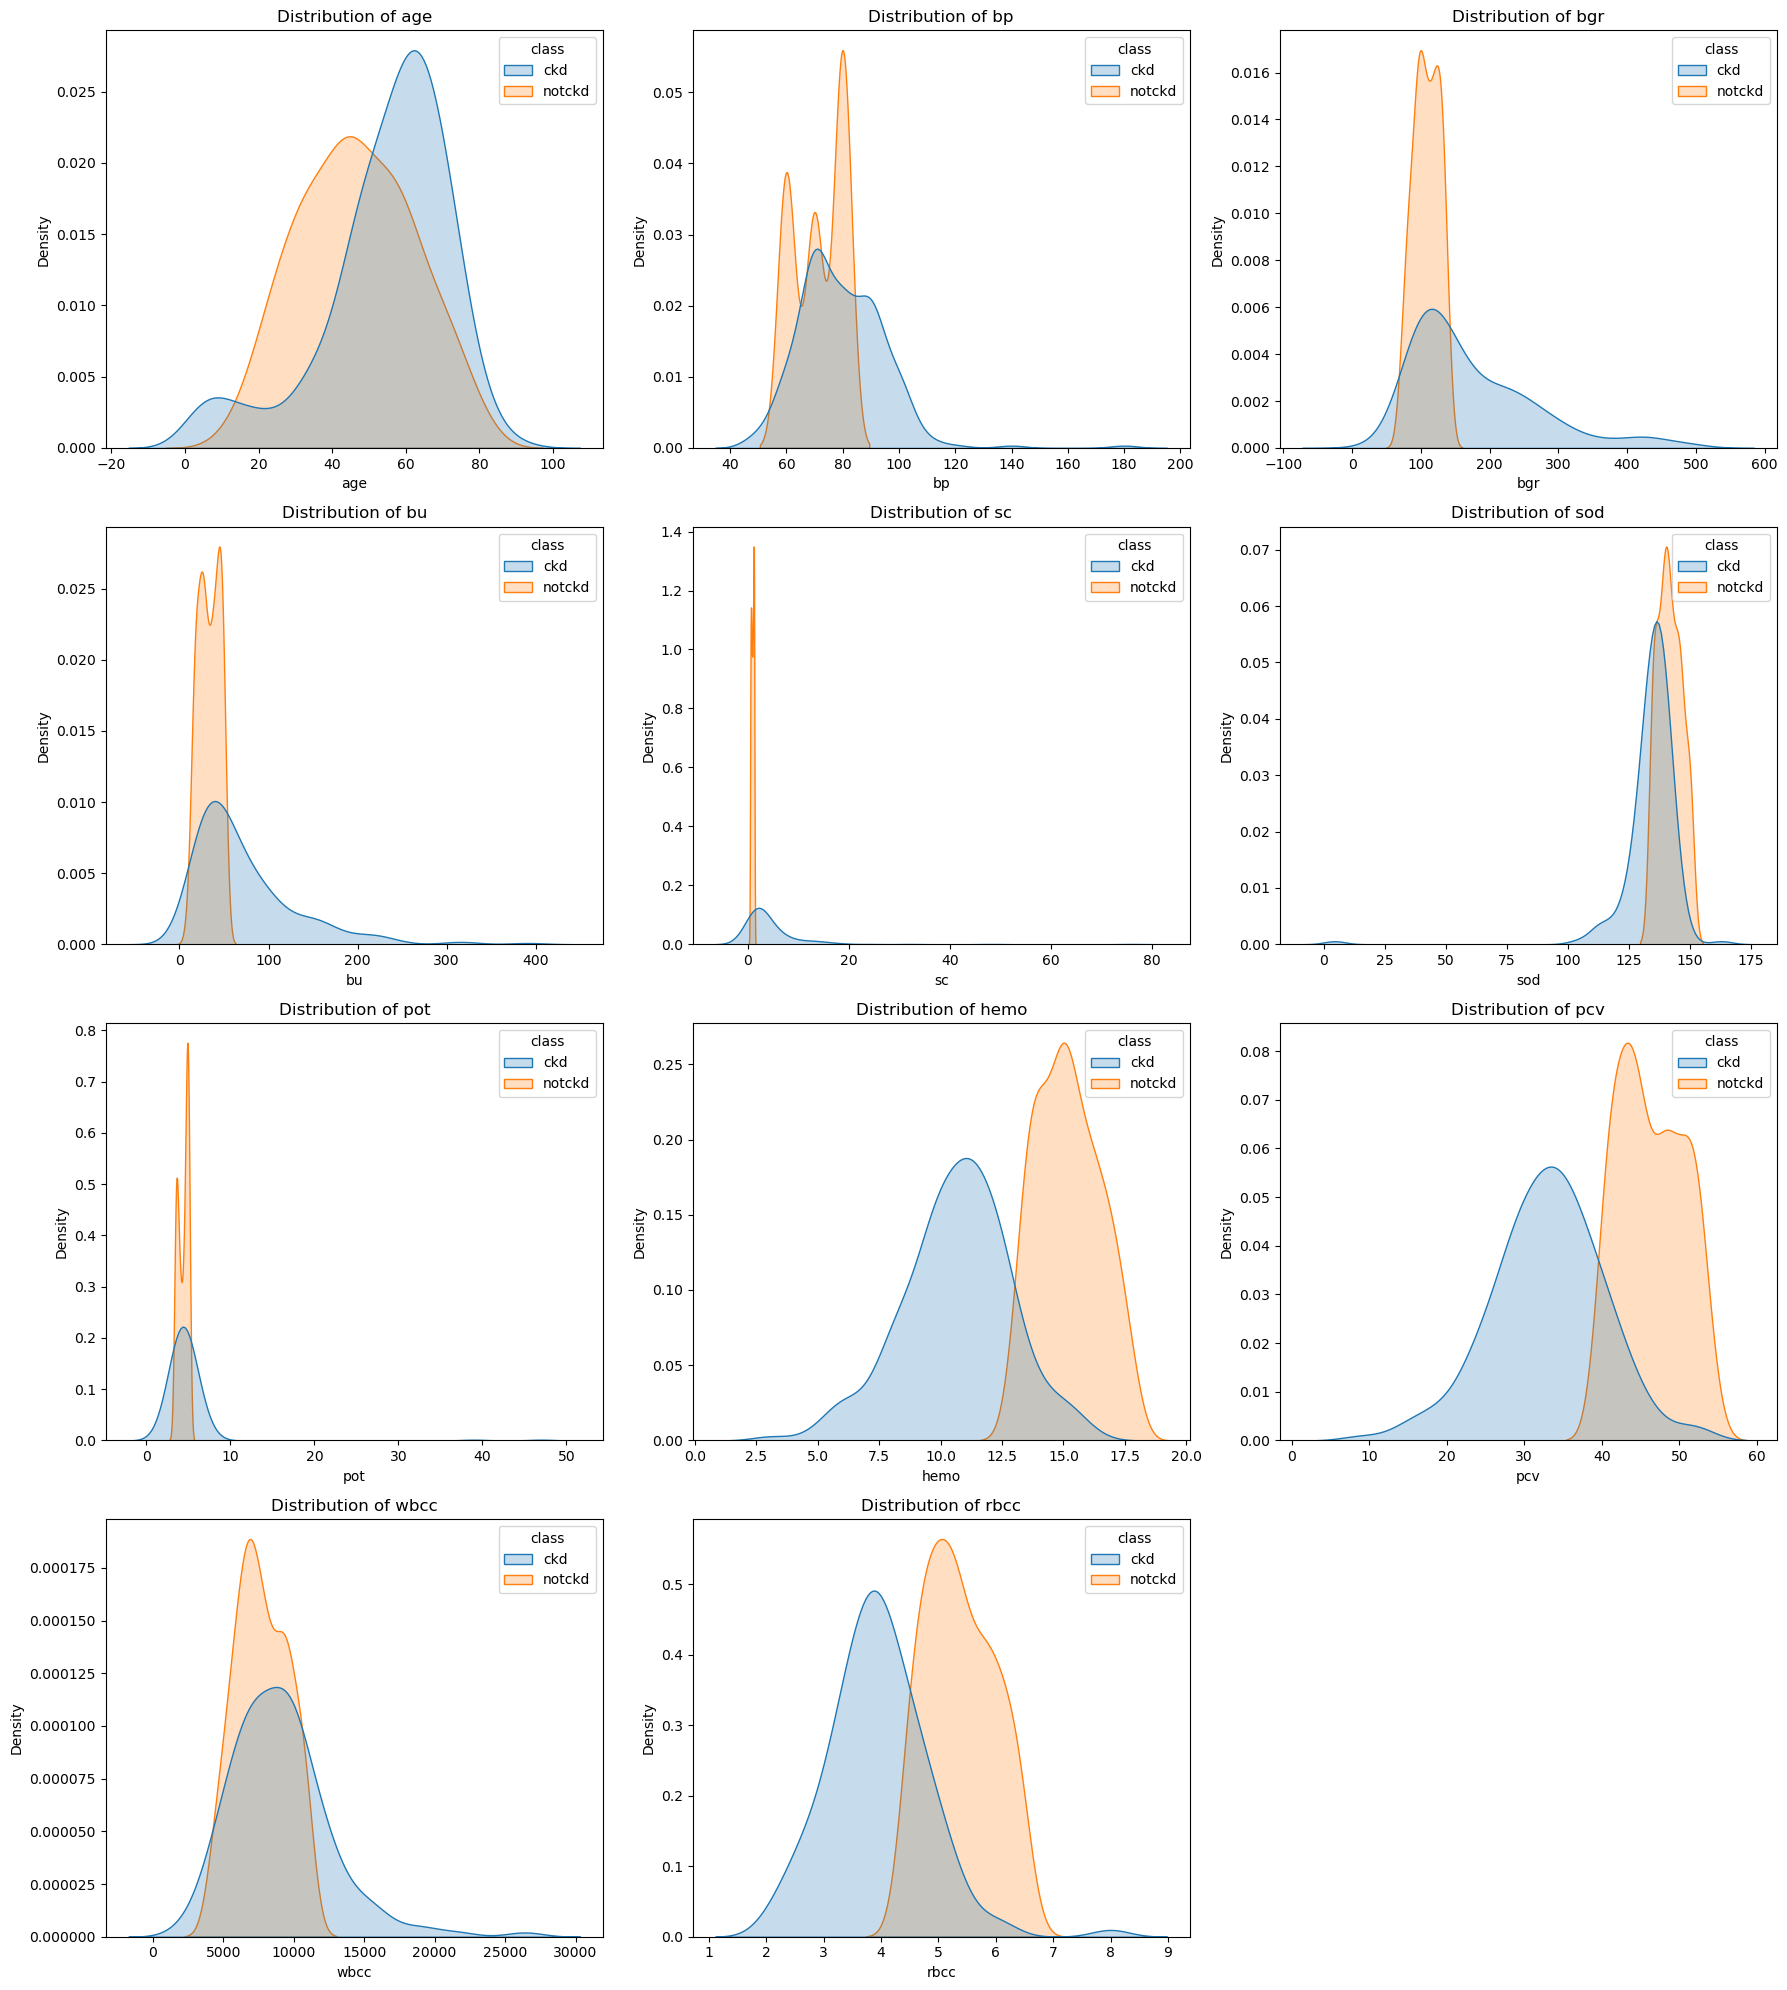

In [18]:
kde_cols = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod',
            'pot', 'hemo', 'pcv', 'wbcc', 'rbcc']

n_cols = 3
n_rows = math.ceil(len(kde_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(kde_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.kdeplot(
        data=df,
        x=col,
        hue='class',
        fill=True,
        common_norm=False
    )
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


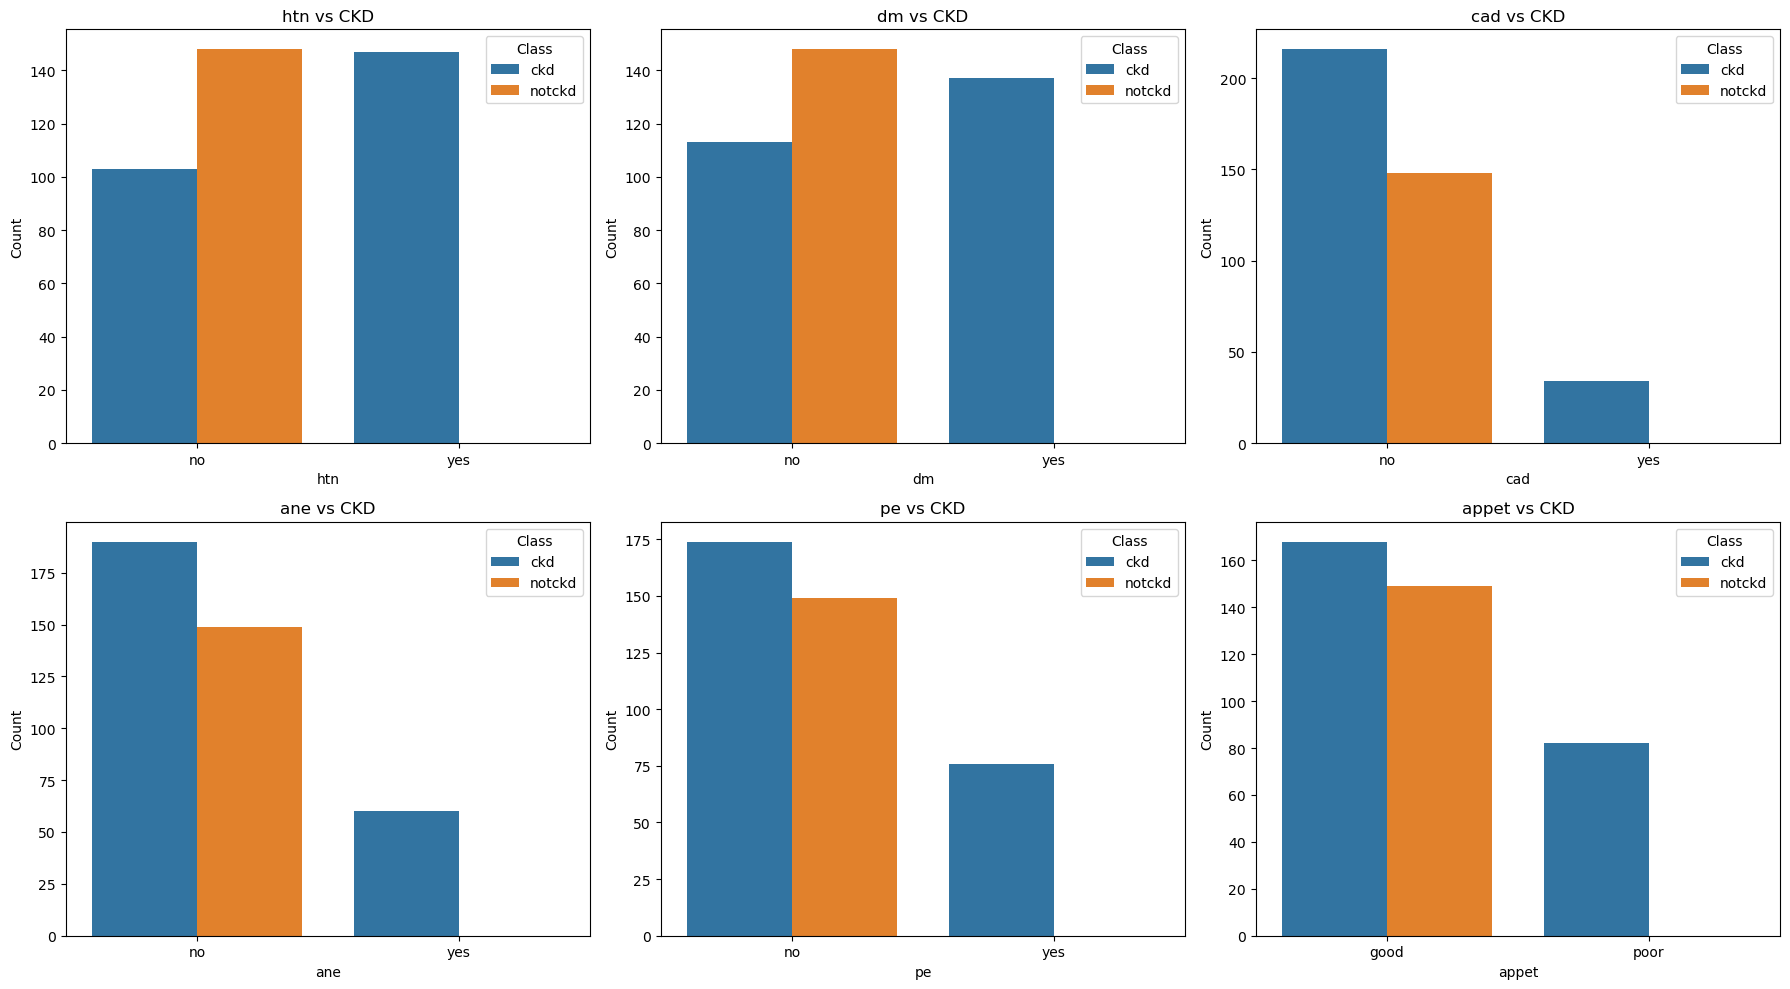

In [19]:
cat_cols = ['htn', 'dm', 'cad', 'ane', 'pe', 'appet']

n_cols = 3
n_rows = math.ceil(len(cat_cols) / n_cols)

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.countplot(x=col, hue='class', data=df)
    plt.title(f'{col} vs CKD')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Class')

plt.tight_layout()
plt.show()

/Users/nebula/opt/anaconda3/envs/CKD_Env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


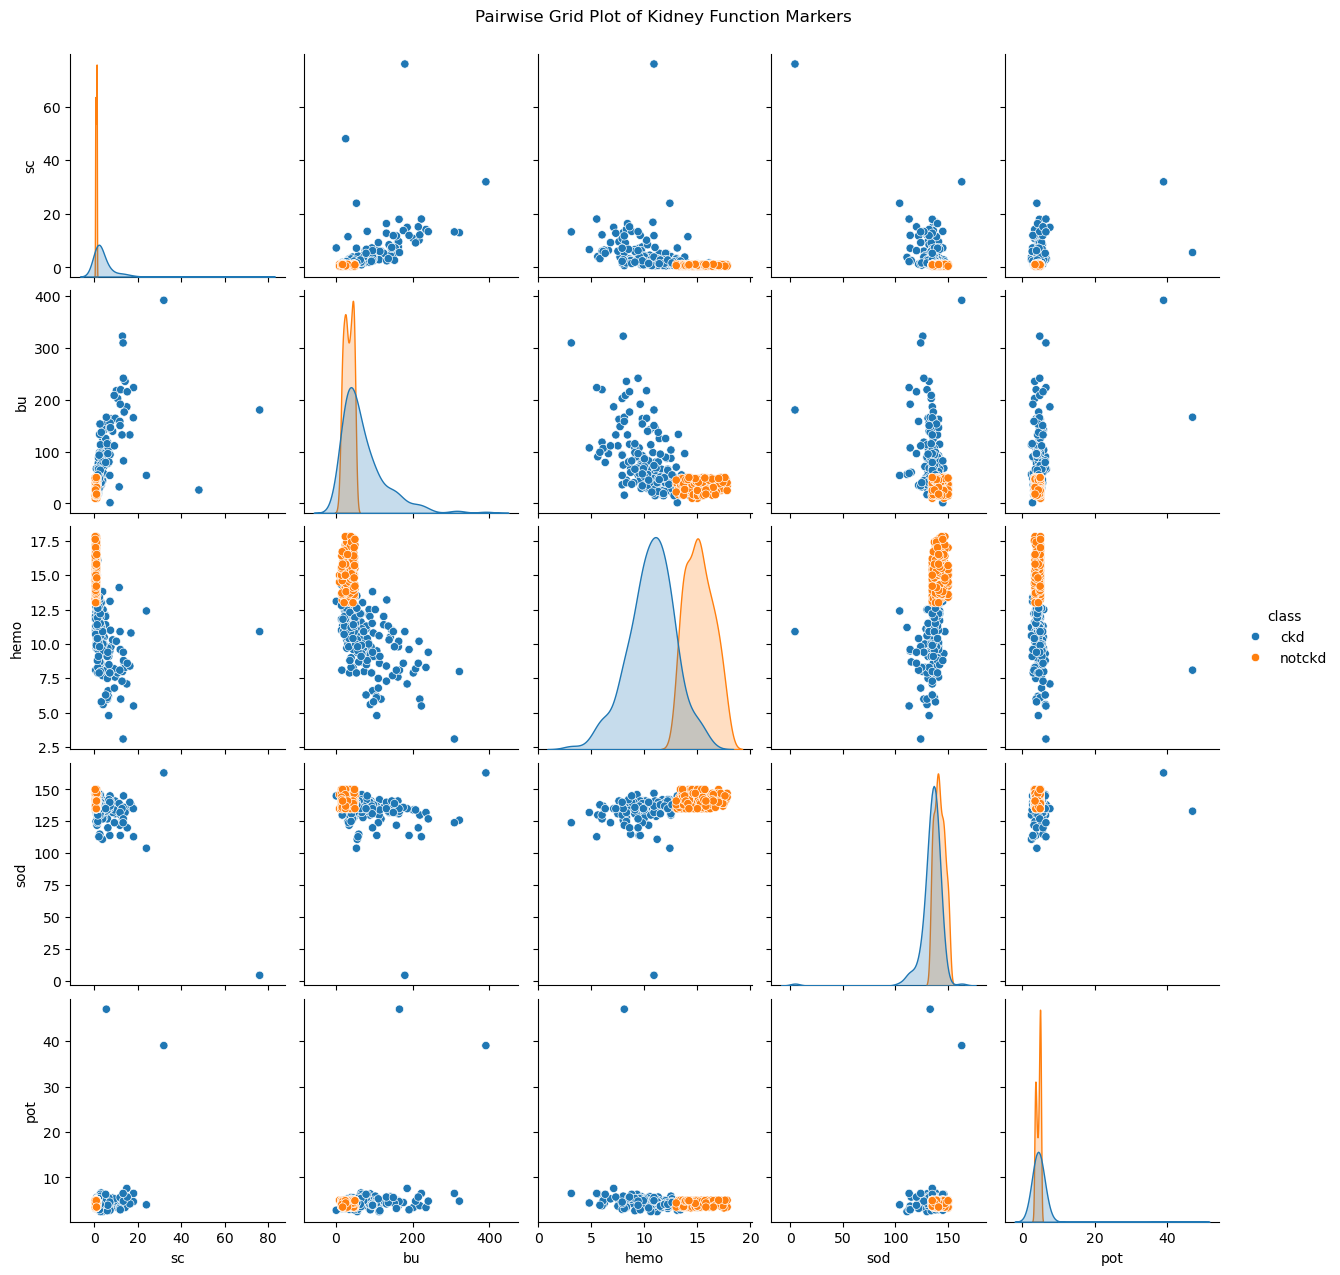

In [21]:
kidney_cols = ['sc', 'bu', 'hemo', 'sod', 'pot']

sns.pairplot(
    df[kidney_cols + ['class']],
    hue='class',
    diag_kind='kde'
)

plt.suptitle('Pairwise Grid Plot of Kidney Function Markers', y=1.02)
plt.show()


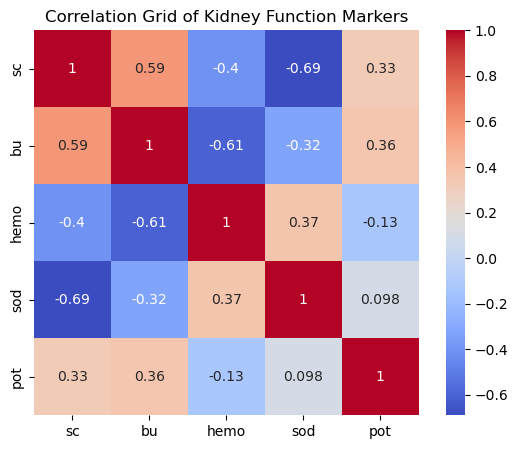

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(
    df[kidney_cols].corr(),
    annot=True,
    cmap='coolwarm',
    square=True
)
plt.title('Correlation Grid of Kidney Function Markers')
plt.show()


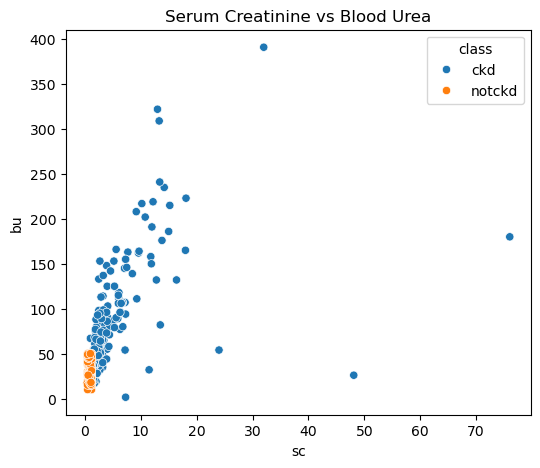

In [23]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='sc', y='bu', hue='class', data=df)
plt.title('Serum Creatinine vs Blood Urea')
plt.show()

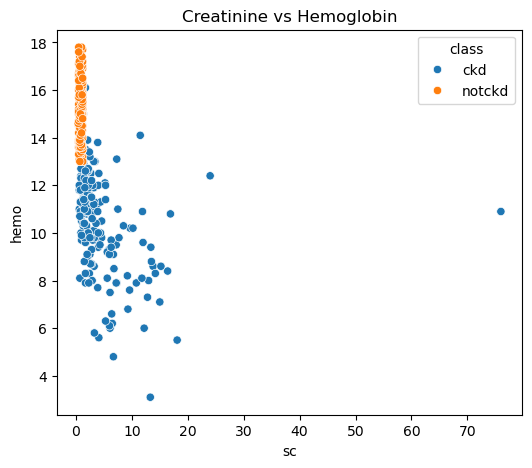

In [24]:
plt.figure(figsize=(6,5))
sns.scatterplot(x='sc', y='hemo', hue='class', data=df)
plt.title('Creatinine vs Hemoglobin')
plt.show()

In [25]:
df['eGFR'] = 186 * (df['sc'] ** -1.154) * (df['age'] ** -0.203)


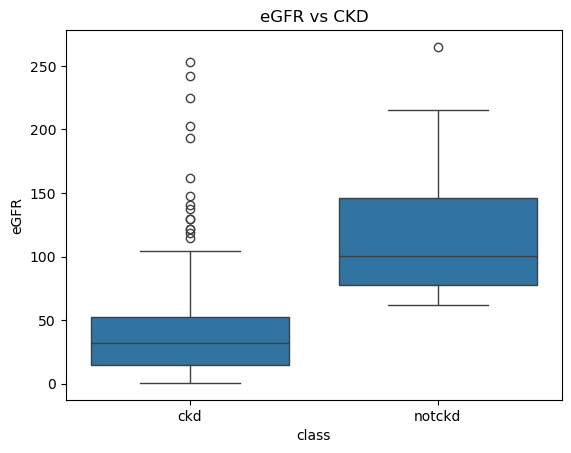

In [26]:
sns.boxplot(x='class', y='eGFR', data=df)
plt.title('eGFR vs CKD')
plt.show()
